In [102]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

In [103]:
def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf



def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)



In [104]:
Bitcoin_df= readStock("BTC(Bitcoin).csv")

In [105]:
Bitcoin_df

,Date,High,Low,Volume
0,2014-09-17,0.003739,0.004243,0.000043
1,2014-09-18,0.003574,0.003649,0.000081
2,2014-09-19,0.003151,0.003217,0.000091
3,2014-09-20,0.003085,0.003298,0.000088
4,2014-09-21,0.002927,0.003348,0.000059
...,...,...,...,...
3049,2023-01-22,0.333125,0.335542,0.070493
3050,2023-01-23,0.334142,0.339565,0.075543
3051,2023-01-24,0.334252,0.337986,0.075219
3052,2023-01-25,0.342827,0.335816,0.087415


In [106]:
Bitcoin_df.describe()

,High,Low,Volume
count,3054.000000,3054.000000,3054.000000
mean,0.189971,0.187007,0.046697
std,0.241287,0.236483,0.056738
min,0.000000,0.000000,0.000000
25%,0.007177,0.007543,0.000283
50%,0.103971,0.103210,0.021886
75%,0.248851,0.250452,0.079625
max,1.000000,1.000000,1.000000


In [107]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3054 non-null   datetime64[ns]
 1   High    3054 non-null   float64       
 2   Low     3054 non-null   float64       
 3   Volume  3054 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 119.3 KB


Sorted_df = Bitcoin_df.sort_values(by=['Date'])
Sorted_df

In [108]:
Sorted_df = Bitcoin_df.sort_values(by=['Date'])
Sorted_df

,Date,High,Low,Volume
0,2014-09-17,0.003739,0.004243,0.000043
1,2014-09-18,0.003574,0.003649,0.000081
2,2014-09-19,0.003151,0.003217,0.000091
3,2014-09-20,0.003085,0.003298,0.000088
4,2014-09-21,0.002927,0.003348,0.000059
...,...,...,...,...
3049,2023-01-22,0.333125,0.335542,0.070493
3050,2023-01-23,0.334142,0.339565,0.075543
3051,2023-01-24,0.334252,0.337986,0.075219
3052,2023-01-25,0.342827,0.335816,0.087415


(0.0, 1.0)

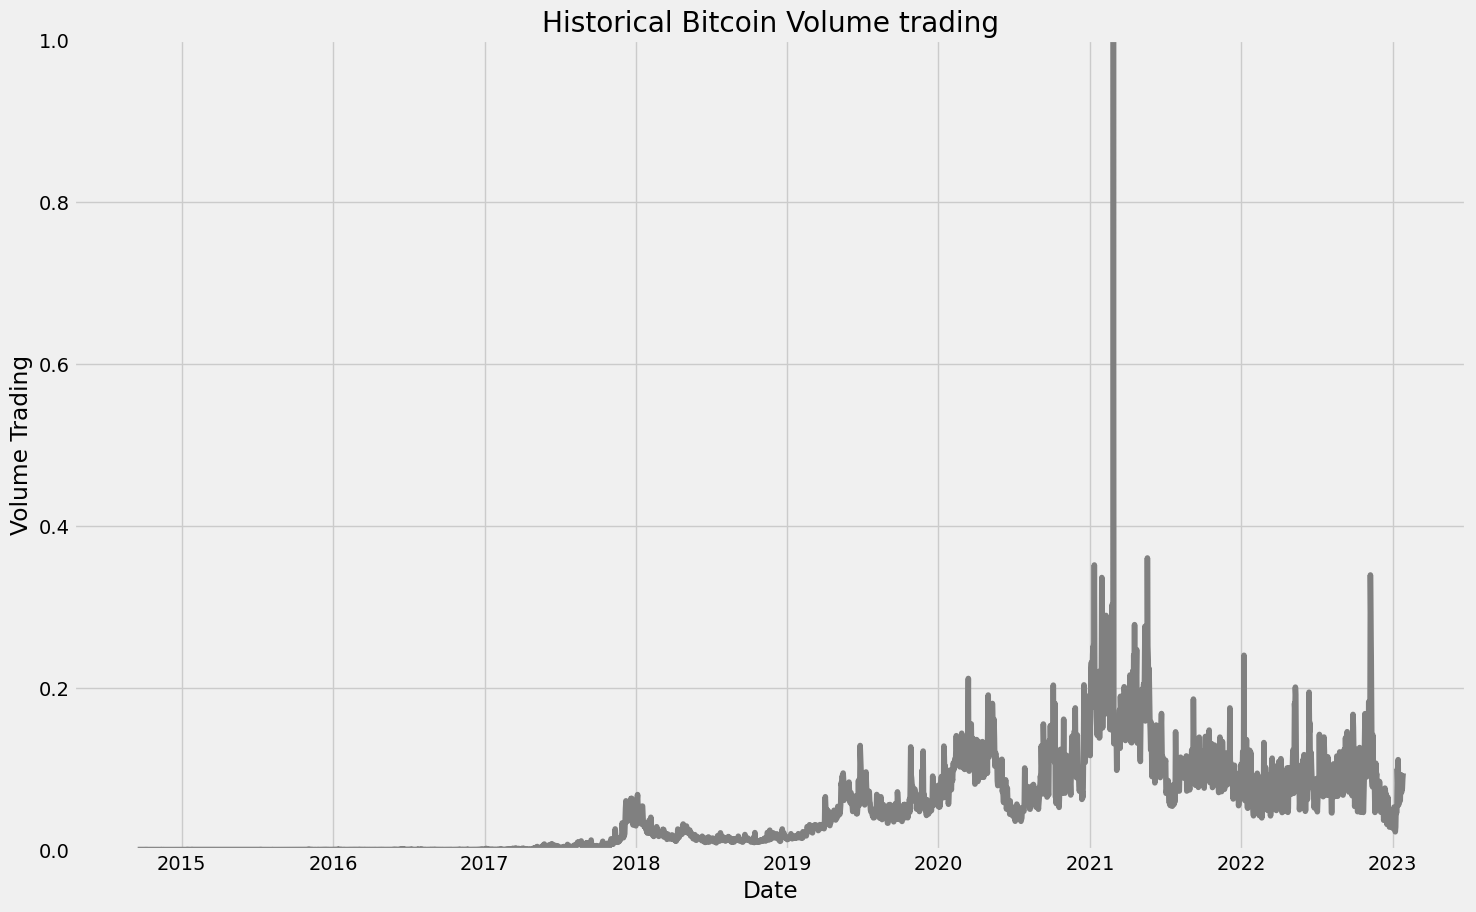

In [109]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.Date, Sorted_df.Volume, color='grey', linestyle= '-')
ax.set(title = "Historical Bitcoin Volume trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 1)




(0.0, 1.0)

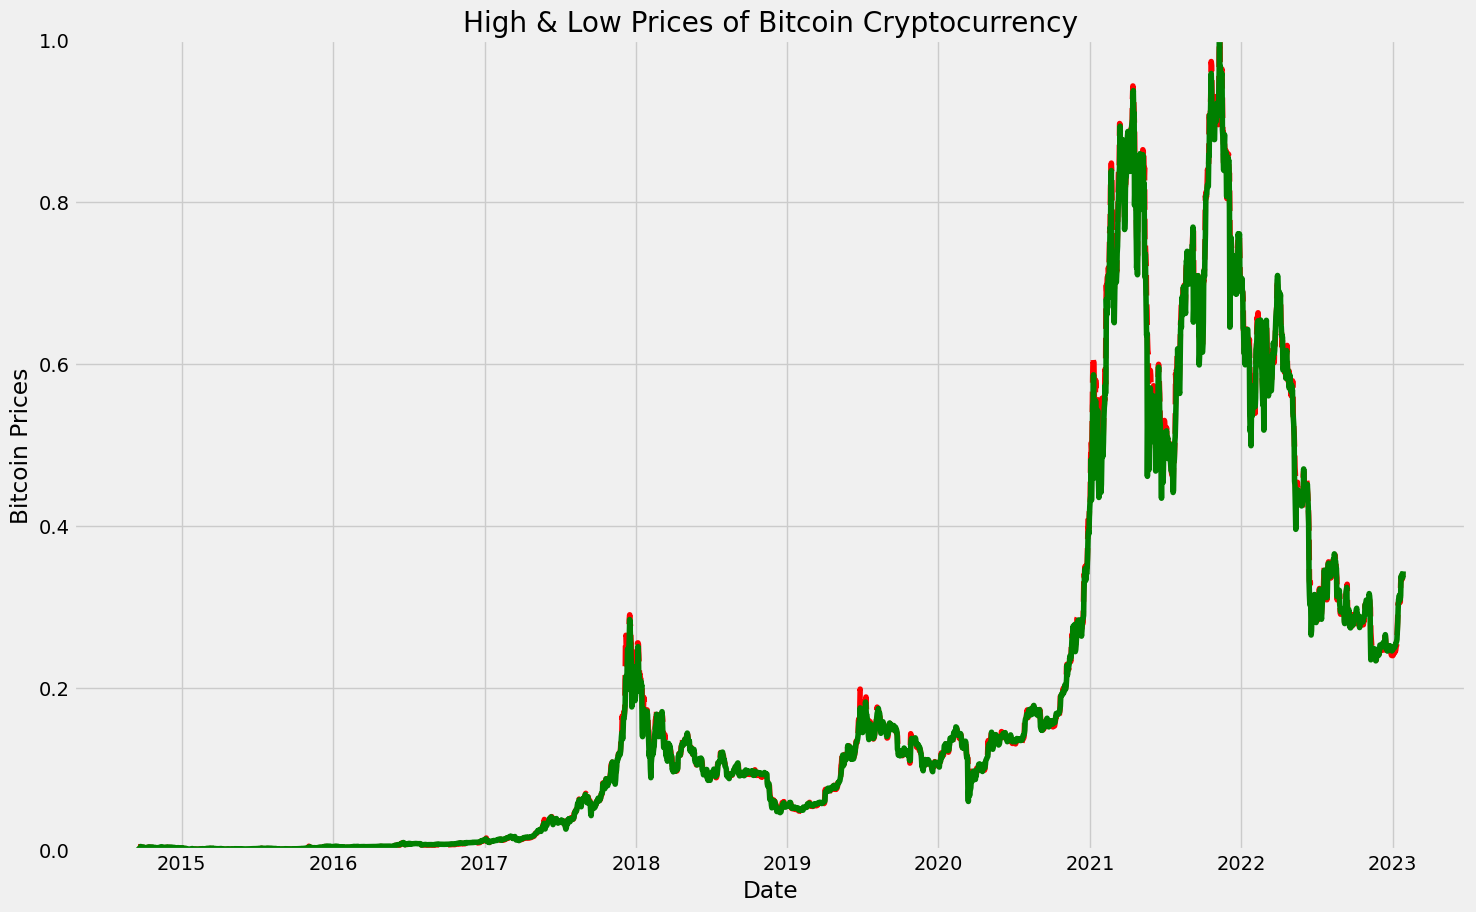

In [110]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.Date,Sorted_df.High, color='red', linestyle= '--')
ax.plot(Sorted_df.Date,Sorted_df.Low, color='green')
ax.set(title = "High & Low Prices of Bitcoin Cryptocurrency",
       xlabel = "Date",
       ylabel = "Bitcoin Prices")


plt.ylim(0, 1)




## MultiLinear Regression Machine Learning Model

In [111]:
Bitcoin_sorted_df = Sorted_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

In [112]:
Bitcoin_sorted_df

,High,Low,Volume
Date,,,
2014-09-17,0.003739,0.004243,0.000043
2014-09-18,0.003574,0.003649,0.000081
2014-09-19,0.003151,0.003217,0.000091
2014-09-20,0.003085,0.003298,0.000088
2014-09-21,0.002927,0.003348,0.000059
...,...,...,...
2023-01-22,0.333125,0.335542,0.070493
2023-01-23,0.334142,0.339565,0.075543
2023-01-24,0.334252,0.337986,0.075219


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [119]:
train_df = Bitcoin_sorted_df[(Bitcoin_sorted_df.index < '2022-01-01')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = Bitcoin_sorted_df[(Bitcoin_sorted_df.index >= '2022-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2663,)
X train Shape: (2663, 2)

TEST
Y test Shape: (391,)
X test Shape: (391, 2)


In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train, y_train)

LinearRegression()

### Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:
### y=0.0157+1.507X<sub>1</sub>-1.366X<sub>2</sub>

In [122]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 0.013946059530351801
Coefficients: [ 1.44737078 -1.29988463]


In [123]:
r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))

Model R2: 0.5991693258481061


In [124]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [125]:

X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1988.
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:10:10   Log-Likelihood:                 5059.1
No. Observations:                2663   AIC:                        -1.011e+04
Df Residuals:                    2660   BIC:                        -1.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.001     16.460      0.0

## Accuracy Assesment
### R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.5829 which means 58.29% of our dependent variable can be explained using our independent variables.

In [126]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.5991693258481062


## Make Future Predictions

In [127]:
print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))


TEST
Y test Shape: (391,)
X test Shape: (391, 2)


In [128]:
Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))

prediction shape: (391,)


In [129]:
Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})

Pred_df

,Prediction,Actual
Date,,
2022-01-01,0.113501,0.070027
2022-01-02,0.103483,0.079626
2022-01-03,0.115704,0.094215
2022-01-04,0.115144,0.121064
2022-01-05,0.163066,0.104983
...,...,...
2023-01-22,0.059936,0.070493
2023-01-23,0.056178,0.075543
2023-01-24,0.058390,0.075219


In [130]:
Pred_df.to_csv('Bitcoin_pred_data.csv', encoding='utf-8')

(0.0, 0.2)

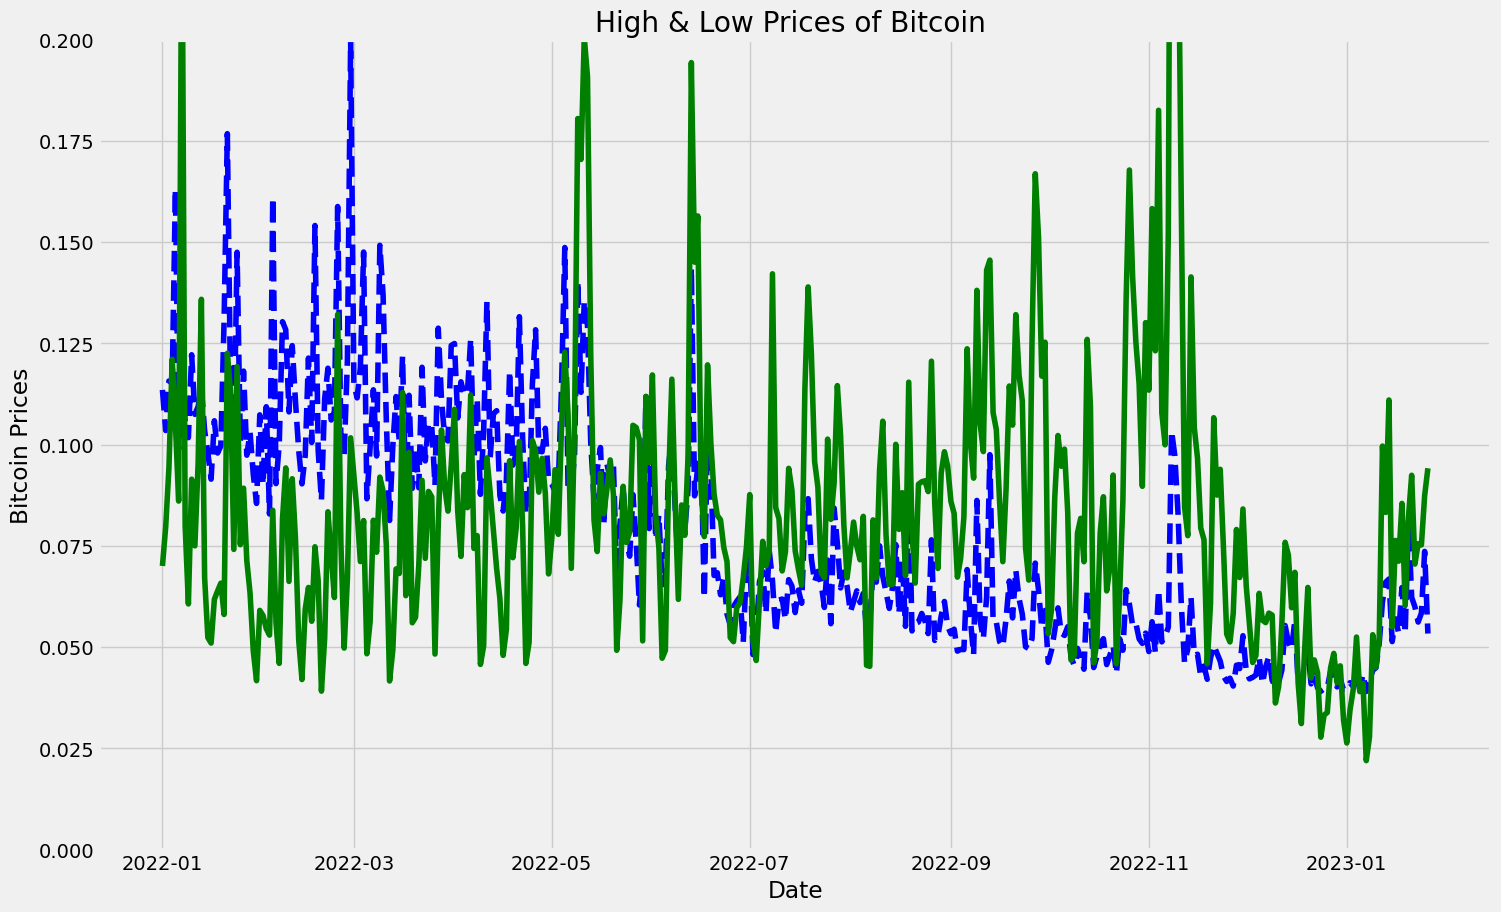

In [131]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Bitcoin ",
       xlabel = "Date",
       ylabel = "Bitcoin Prices")


plt.ylim(0, 0.2)



In [132]:
r2 = model.score(X_test, y_test)

print("Prediction score: " + str(r2))

Prediction score: -0.2456597441837587


 ### Predicted R2 score is about 43% which means High and low prices of bitcoin are somewhat related to Volume trading and prediction is 43% accurate.
    

## 3D representation of the Multilinear Machine Learning Model

In [133]:
# Prepare data
X = Bitcoin_sorted_df[['High', 'Low']].values.reshape(-1,2)
Y = Bitcoin_sorted_df['Volume']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y



xx_pred = np.linspace(0, 1,20)  # range of High  values

yy_pred = np.linspace(0,1,20)  # range of Low values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



/Users/shreya/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Users/shreya/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


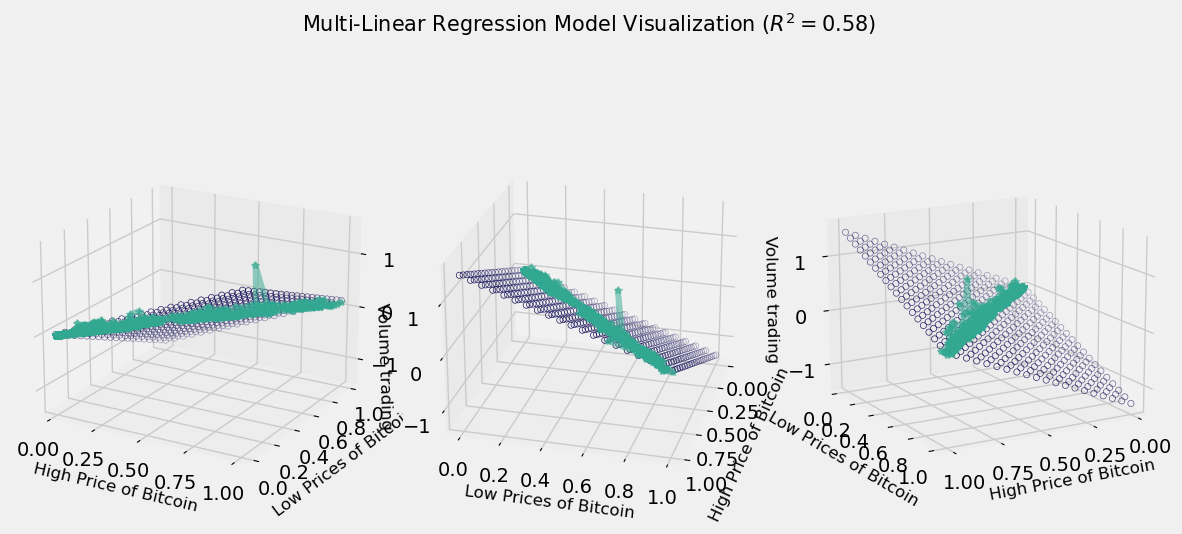

In [134]:
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='#32a891', zorder=15, linestyle='-', marker='*', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#150e57')
    ax.set_xlabel('High Price of Bitcoin', fontsize=12)
    ax.set_ylabel('Low Prices of Bitcoin', fontsize=12)
    ax.set_zlabel('Volume trading ', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

    


ax1.view_init(elev=20, azim=-60)
ax2.view_init(elev=25, azim=15)
ax3.view_init(elev=15, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()





In [135]:
import seaborn as sns

Pearson correlation coefficient matrix of each variables:
           Volume      High       Low
Volume  1.000000  0.720484  0.708519
High    0.720484  1.000000  0.999007
Low     0.708519  0.999007  1.000000


/Users/shreya/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


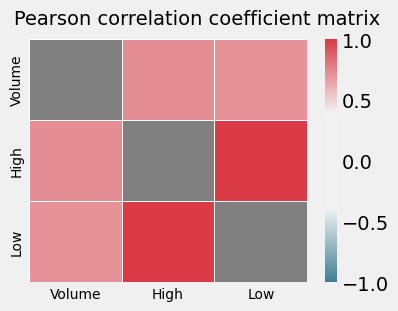

In [136]:

corr = Bitcoin_df[['Volume', 'High', 'Low']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()